In [13]:
import graphviz

In [24]:
class Node:
    def __init__(self, label, color=None):
        self.label = label
        self.color = color

In [36]:
class Graph:
    def __init__(self, file_path=None):
        self.nodes = {}
        self.nb_vertices = 0
        self.nb_edges = 0
        
        if file_path is not None:
            with open(file_path, 'r') as file:
                for line in file:
                    line = line.strip()
                    if not line or line.startswith('c'):
                        continue  # Ignore comment lines
                    
                    if line.startswith('p'):
                        parts = line.split()
                        if len(parts) != 4 or parts[1] != 'ds':
                            raise ValueError("Invalid problem descriptor in .gr file")
                        # We can extract n (vertices) and m (edges) if needed
                        self.nb_vertices, self.nb_edges = int(parts[2]), int(parts[3])
                        continue
                    
                    parts = line.split()
                    if len(parts) == 2:
                        try:
                            u, v = int(parts[0]), int(parts[1])
                            u = Node(str(u))
                            v = Node(str(v), color='blue')
                            self.add_node(u)
                            self.add_node(v)
                            self.add_edge(u,v)
                            edges.append((u, v))
                        except ValueError:
                            raise ValueError(f"Invalid edge definition: {line}")

    def add_node(self, node):
        if not node in self.nodes:
            self.nodes[node] = []
            self.nb_vertices += 1

    def add_edge(self, node_1, node_2):
        assert(node_1 in self.nodes)
        assert(node_2 in self.nodes)
        assert(node_2 not in self.nodes[node_1])
        assert(node_1 not in self.nodes[node_2])
        self.nodes[node_1].append(node_2)
        self.nodes[node_2].append(node_1)

    def to_graphviz(self):
        g = graphviz.Graph()
        edges = []
        for node in self.nodes.keys():
            g.node(node.label, color=node.color)
            for neighbor in self.nodes[node]:
                if (node.label, neighbor.label) not in edges and (neighbor.label, node.label) not in edges:
                    edges.append((node.label, neighbor.label))
        for i,j in edges:
            g.edge(i,j)
        return g

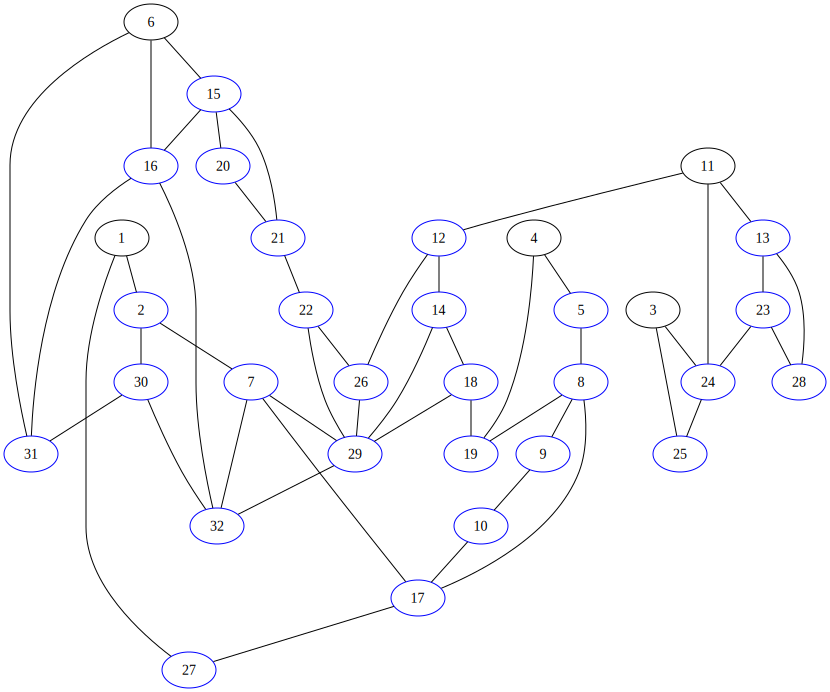

In [42]:
file_path = "tests/bremen_subgraph_20.gr"

graph = Graph(file_path)
gv = graph.to_graphviz()
gv